# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [411]:
# ===== 1. Import libraries =====
import pandas as pd

# ===== 2. Read the dataset =====
# Read the CSV file into a DataFrame
df = pd.read_csv("Summary of Weather.csv")

# ===== 3. Basic overview =====
# Print the overall dimension of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 119040 rows and 31 columns.


/tmp/ipython-input-411-632382941.py:6: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv")


In [412]:
# Show column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [413]:
# ===== 4. Quick statistical summary =====
# Generate descriptive statistics for numeric columns
df.describe().T  # transpose for readability

,count,mean,std,min,25%,50%,75%,max
STA,119040.0,29659.435795,20953.209402,10001.000000,11801.000000,22508.000000,33501.000000,82506.000000
WindGustSpd,532.0,37.774534,10.297808,18.520000,29.632000,37.040000,43.059000,75.932000
MaxTemp,119040.0,27.045111,8.717817,-33.333333,25.555556,29.444444,31.666667,50.000000
MinTemp,119040.0,17.789511,8.334572,-38.333333,15.000000,21.111111,23.333333,34.444444
MeanTemp,119040.0,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.000000
YR,119040.0,43.805284,1.136718,40.000000,43.000000,44.000000,45.000000,45.000000
MO,119040.0,6.726016,3.425561,1.000000,4.000000,7.000000,10.000000,12.000000
DA,119040.0,15.797530,8.794541,1.000000,8.000000,16.000000,23.000000,31.000000
DR,533.0,26.998124,15.221732,2.000000,11.000000,32.000000,34.000000,78.000000
SPD,532.0,20.396617,5.560371,10.000000,16.000000,20.000000,23.250000,41.000000


In [414]:
# ===== 5. Peek at the data =====
# Display the first and last five rows
display(df.head())
display(df.tail())

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119039,82506,1945-12-31,0,NaN,29.444444,17.222222,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [415]:
print("Unique non-null values in Snowfall (as string):")
print(df['Snowfall'].dropna().unique())

print("\nNumber of rows where Snowfall is missing:")
print(df['Snowfall'].isna().sum())

print("\nNumber of rows where Snowfall == 'T':")
print((df['Snowfall'] == 'T').sum())

Unique non-null values in Snowfall (as string):
[0.0 '0' '22.86' '33.02' '30.48' '2.54' '5.08' '10.16' '7.62' '20.32'
 '15.24' '17.78' '12.7' '25.4' '27.94' '43.18' '38.1' '45.72' '53.34'
 '58.42' '66.04' '76.2' '81.28' '73.66' '63.5' '50.8' '48.26' '60.96'
 '55.88' '35.56' '78.74' '40.64' '86.36' '83.82' '68.58' '#VALUE!' 10.16
 7.62 15.24 2.54 5.08 12.7]

Number of rows where Snowfall is missing:
1163

Number of rows where Snowfall == 'T':
0


## 2. Clean the dataset, drop variables

In [416]:
# ===== 1. Copy the raw DataFrame =====
weather_df = df.copy()

# ===== 2. Drop columns that are certain missing values=====
# Threshold: keep columns with at least 80 % non-null values
valid_ratio = 0.8
cols_to_drop_na = weather_df.columns[weather_df.isna().mean() > (1 - valid_ratio)]
weather_df.drop(columns=cols_to_drop_na, inplace=True)

# ===== 3. Handle 'Trace' values ('T') in precipitation / snowfall fields =====
trace_fields = ['Precip', 'Snowfall', 'PRCP', 'SNF']
for col in trace_fields:
    if col in weather_df.columns:
        # replace 'T' with 0.0
        weather_df[col] = weather_df[col].replace('T', 0.0)

        # convert to float (invalid strings become NaN)
        weather_df[col] = pd.to_numeric(weather_df[col], errors='coerce')

        # fill missing with column mean
        weather_df[col] = weather_df[col].fillna(weather_df[col].mean())

# ===== 4. Convert object columns (now numeric-like) to floats =====
obj_cols = weather_df.select_dtypes(include='object').columns.difference(['Date'])
weather_df[obj_cols] = weather_df[obj_cols].apply(pd.to_numeric, errors='coerce')

# ===== 5. Remove duplicated information (keep metric units, drop imperial) =====
imperial_cols = ['MAX', 'MIN', 'MEA', 'PRCP', 'SNF', 'SND']  # °F / inch based
weather_df.drop(columns=[c for c in imperial_cols if c in weather_df.columns], inplace=True)


In [417]:
print("All columns in weather_df:")
print(weather_df.columns.tolist())

display(weather_df.head())

All columns in weather_df:
['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'YR', 'MO', 'DA']


,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1
1,10001,1942-7-2,0.000,28.888889,21.666667,25.555556,0.0,42,7,2
2,10001,1942-7-3,2.540,26.111111,22.222222,24.444444,0.0,42,7,3
3,10001,1942-7-4,2.540,26.666667,22.222222,24.444444,0.0,42,7,4
4,10001,1942-7-5,0.000,26.666667,21.666667,24.444444,0.0,42,7,5


## 3. Select the feature(s) for the model, and explain the reason

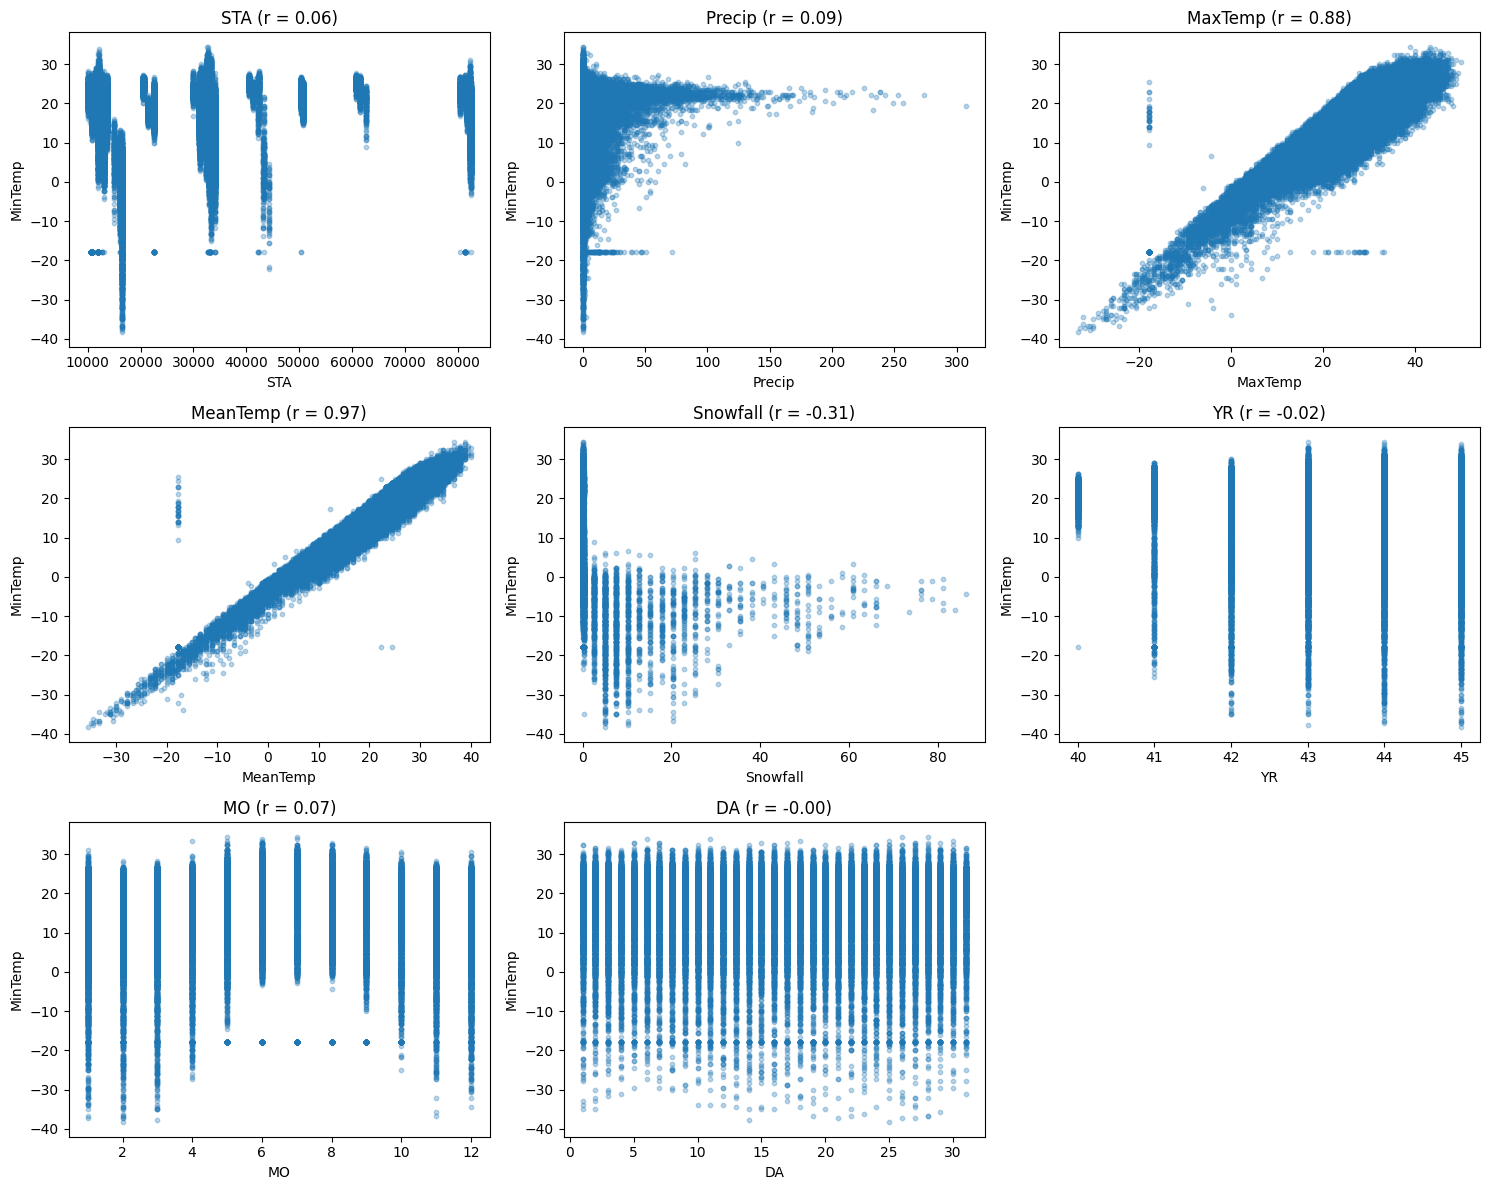

Features dropped due to extreme correlation with target: ['MaxTemp', 'MeanTemp', 'YR', 'DA']
Highly collinear predictor features to drop (|r| > 0.85): []
Clean dataset shape: 119040 rows × 6 columns


In [418]:
# ===== Scatter plots for correlations with target (MinTemp) =====
import numpy as np
import matplotlib.pyplot as plt

# Extract numeric columns (excluding target itself)
numeric_cols = weather_df.select_dtypes(include=[np.number]).columns.drop('MinTemp')

# Dynamic subplot grid: 3 columns per row
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

for idx, col in enumerate(numeric_cols):
    r = weather_df[col].corr(weather_df['MinTemp'])
    ax = axes[idx // n_cols][idx % n_cols]
    ax.scatter(weather_df[col], weather_df['MinTemp'], alpha=0.3, s=10)
    ax.set_title(f"{col} (r = {r:.2f})")
    ax.set_xlabel(col)
    ax.set_ylabel("MinTemp")

# Hide empty subplots
for j in range(idx + 1, n_rows * n_cols):
    axes[j // n_cols][j % n_cols].set_visible(False)

plt.tight_layout()
plt.show()

# ===== 7. Drop features with |corr| > 0.85 or |corr| < 0.05 with target =====
corr_series = weather_df.corr(numeric_only=True)['MinTemp'].drop('MinTemp')
to_drop_target = corr_series[(corr_series.abs() > 0.85) | (corr_series.abs() < 0.05)].index.tolist()

print(f"Features dropped due to extreme correlation with target: {to_drop_target}")
weather_df.drop(columns=to_drop_target, inplace=True)

# ===== 8. Drop highly collinear predictors (|r| > 0.85 between predictors) =====
corr_matrix = weather_df.corr(numeric_only=True).abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [col for col in upper_tri.columns if any(upper_tri[col] > 0.85)]

print(f"Highly collinear predictor features to drop (|r| > 0.85): {high_corr_features}")
weather_df.drop(columns=high_corr_features, inplace=True)

# ===== 9. Final clean DataFrame =====
print(f"Clean dataset shape: {weather_df.shape[0]} rows × {weather_df.shape[1]} columns")


In [419]:
print(weather_df.shape)

print("Current features in weather_df:")
print(weather_df.columns.tolist())

(119040, 6)
Current features in weather_df:
['STA', 'Date', 'Precip', 'MinTemp', 'Snowfall', 'MO']


In [420]:
display(weather_df.head())

,STA,Date,Precip,MinTemp,Snowfall,MO
0,10001,1942-7-1,1.016,22.222222,0.0,7
1,10001,1942-7-2,0.000,21.666667,0.0,7
2,10001,1942-7-3,2.540,22.222222,0.0,7
3,10001,1942-7-4,2.540,22.222222,0.0,7
4,10001,1942-7-5,0.000,21.666667,0.0,7


## 4. Split the dataset (80% for training, 20% for testing)

In [421]:
# ===== Separate features (X) and target (y) =====
target_col = 'MinTemp'
X = weather_df.drop(columns=[target_col])
y = weather_df[target_col]

# ===== Split the dataset =====
from sklearn.model_selection import train_test_split

# 80 % train, 20 % test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

print(f"Training set:  {X_train.shape[0]} rows "
      f"({X_train.shape[0] / weather_df.shape[0]:.2%} of total)")
print(f"Test set:      {X_test.shape[0]} rows "
      f"({X_test.shape[0] / weather_df.shape[0]:.2%} of total)")


Training set:  95232 rows (80.00% of total)
Test set:      23808 rows (20.00% of total)


## 5. Choose the algorithm, train and test the model

In [422]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
STA,95232.0,29698.359984,20955.164614,10001.0,11801.0,22508.0,33501.000,82506.00
Precip,95232.0,3.237796,10.790578,0.0,0.0,0.0,1.016,307.34
Snowfall,95232.0,0.247635,2.623665,0.0,0.0,0.0,0.000,86.36
MO,95232.0,6.728411,3.427128,1.0,4.0,7.0,10.000,12.00


In [424]:
# ===== 1. Import libraries =====
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Identify numeric columns (RandomForest can handle non-scaled data, but LinearRegression benefits from scaling)
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

# ===== 2. Preprocessing & baseline Linear Regression =====
lin_pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

lin_pipeline.fit(X_train[numeric_features], y_train)
y_pred_lin = lin_pipeline.predict(X_test[numeric_features])

mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"[Linear Regression]  RMSE = {rmse_lin:.2f}  |  R² = {r2_lin:.3f}")

# ===== 3. Random Forest Regressor =====
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train[numeric_features], y_train)
y_pred_rf = rf_model.predict(X_test[numeric_features])

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"[Random Forest]      RMSE = {rmse_rf:.2f}  |  R² = {r2_rf:.3f}")


[Linear Regression]  RMSE = 7.85  |  R² = 0.105
[Random Forest]      RMSE = 2.92  |  R² = 0.876


## 6. Evaluate and Visualize model Performance

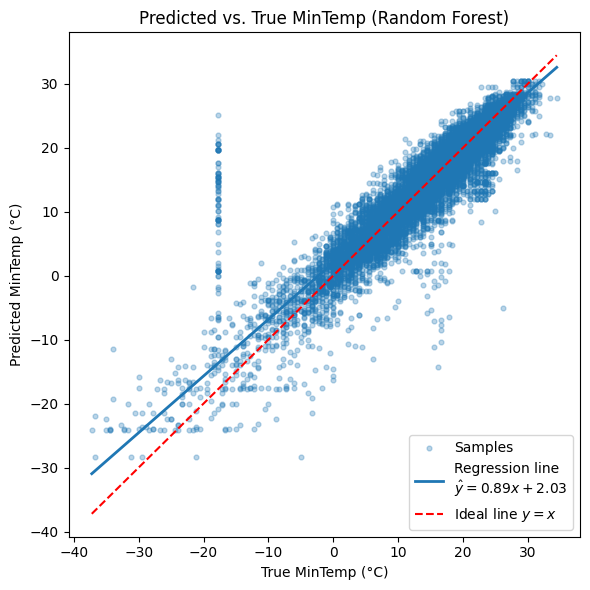

In [427]:
# ===== 1. Prepare true and predicted values =====
y_true = y_test.values.reshape(-1, 1)
y_pred = y_pred_rf.reshape(-1, 1)          # change to y_pred_lin if needed

# ===== 2. Fit regression line (predicted vs. true) =====
from sklearn.linear_model import LinearRegression
reg_line = LinearRegression().fit(y_true, y_pred)
slope = reg_line.coef_[0][0]
intercept = reg_line.intercept_[0]

# ===== 3. Plot =====
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.3, s=12, label='Samples')

# Regression line
x_vals = np.linspace(y_true.min(), y_true.max(), 100).reshape(-1, 1)
plt.plot(x_vals, reg_line.predict(x_vals), linewidth=2,
         label=f'Regression line\n$\\hat y = {slope:.2f}x + {intercept:.2f}$')

# Ideal y = x line
plt.plot(x_vals, x_vals, 'r--', linewidth=1.5, label='Ideal line $y = x$')

plt.xlabel('True MinTemp (°C)')
plt.ylabel('Predicted MinTemp (°C)')
plt.title('Predicted vs. True MinTemp (Random Forest)')
plt.legend()
plt.tight_layout()
plt.show()


## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [425]:
# write your answer here

## 8. Discuss the model performance based on the plot

In [426]:
# write your answer here